In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import model_from_json
import matplotlib.pyplot as plt
import matplotlib
import brewer2mpl
import numpy as np
import pandas as pd

set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
%matplotlib inline

Using Theano backend.


In [44]:
# import dataset:
# X_fname = 'data/X_publictest6_100pct.npy'
y_fname = 'data/y_publictest6_100pct.npy'
# X_train = np.load(X_fname)
y_train = np.load(y_fname)
print 'Loading data...'
y_labels = [np.argmax(lst) for lst in y_train]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
zip(labels, counts)

Loading data...


[('angry', 523),
 ('fear', 496),
 ('happy', 895),
 ('sad', 653),
 ('surprise', 415),
 ('neutral', 607)]

[('angry', 4431),
 ('fear', 4097),
 ('happy', 7215),
 ('sad', 4830),
 ('surprise', 3171),
 ('neutral', 4965)]

In [3]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu',
                        input_shape=(1, X_train.shape[2], X_train.shape[3])))
first_layer = model.layers[0]
input_layer = first_layer.input
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))


In [4]:
# load json and create model
json_file = open('data/results/model.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

In [5]:
# load weights into new model
model.load_weights('data/weights/model.h5')

In [6]:
# load test set
X_fname = 'data/X_train_privatetest6_100pct.npy'
y_fname = 'data/y_train_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print 'Loading data...'

Loading data...


In [7]:
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X, y, verbose=0)

In [8]:
print "model %s: %.2f%%" % (model.metrics_names[1], score[1]*100)

model acc: 58.07%


In [9]:
# doesn't work
from keras import backend as K
get_3rd_layer_output = K.function([model.layers[0].input],\
                                  [model.layers[3].output])
layer_output = get_3rd_layer_output([X])[0]
print model.layers[0].input
print model.layers[2].output

convolution2d_input_2
Elemwise{mul,no_inplace}.0


In [10]:
def plot_filters(layer, x, y):
    filters = layer.W.get_value()
    fig = plt.figure(figsize=(12, 12))
    for j in range(len(filters)):
        ax = fig.add_subplot(y, x, j+1)
        ax.matshow(filters[j][0], cmap = matplotlib.cm.plasma)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

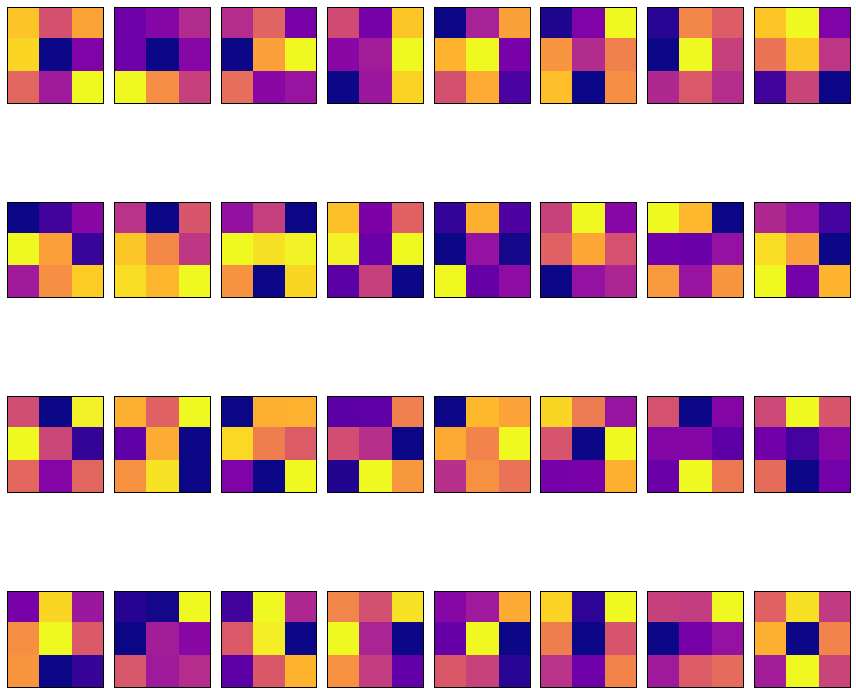

In [11]:
plot_filters(model.layers[0], 8, 4)

In [12]:
# plot_filters(model.layers[4], 8, 8)

In [13]:
# plot_filters(model.layers[10], 16, 8)

(1, 1, 48, 48)


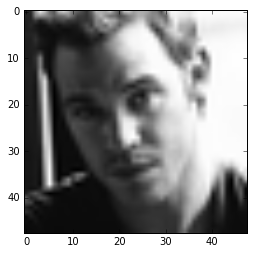

In [14]:
input_img = X[0:1,:,:,:] # subject0
print(input_img.shape)
plt.imshow(input_img[0,0,:,:], cmap='gray')

In [15]:
import theano
output_fn = theano.function([model.layers[0].input],\
                            model.layers[1].output, allow_input_downcast=True)
# <theano.compile.function_module.Function at 0x125b7ef50>
im = output_fn(input_img)
im.shape

(1, 32, 48, 48)

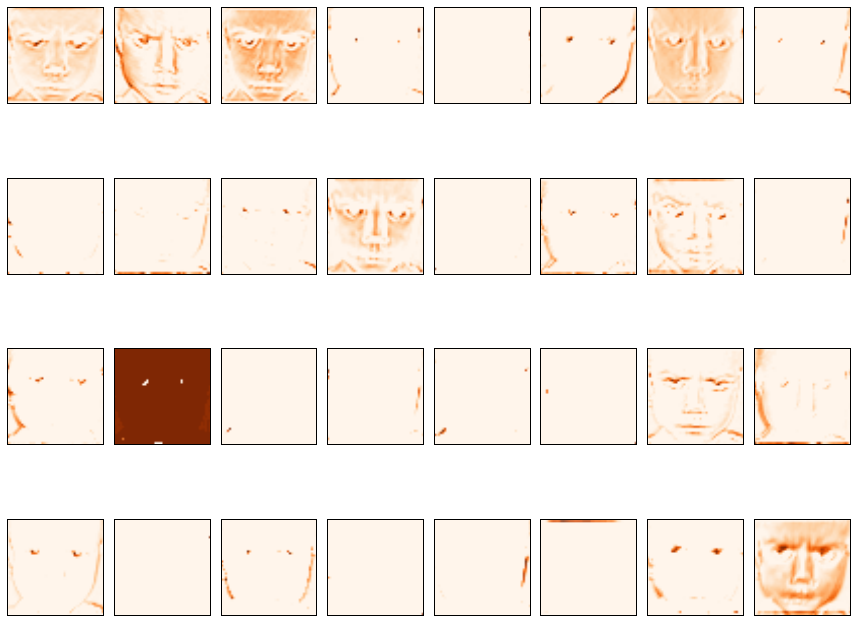

In [16]:
input_img = X[9:10,:,:,:] # subject9
im = output_fn(input_img)
fig = plt.figure(figsize=(12,12))
for i in range(im.shape[1]):
    ax = fig.add_subplot(4,8,i+1)
    ax.imshow(im[0,i,:,:], cmap=matplotlib.cm.Oranges)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

In [17]:
seq_colors=['Blues', 'BuGn', 'BuPu','GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
            'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu', 
            'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'bone', 'cool','copper', 
            'gist_heat', 'gray', 'hot','pink', 'spring', 'summer', 'winter', 'BrBG',
            'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr','RdBu', 'RdGy', 'RdYlBu', 
            'RdYlGn', 'Spectral','seismic']

In [18]:
def plot_interlayer_outputs(input_img, layer_num1, layer_num2, colormaps=False):
    output_fn = theano.function([model.layers[layer_num1].input], # import theano
                                 model.layers[layer_num2].output, allow_input_downcast=True)
    im = output_fn(input_img) #filtered image
    n_filters = im.shape[1]
    fig = plt.figure(figsize=(12,12))
    for i in range(n_filters):
        ax = fig.add_subplot(n_filters/8,8,i+1)
        if colormaps:
            ax.imshow(im[0,i,:,:], cmap='Set2')#seq_colors[i]
        else:
            ax.imshow(im[0,i,:,:], cmap=matplotlib.cm.inferno) #matplotlib.cm.gray
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

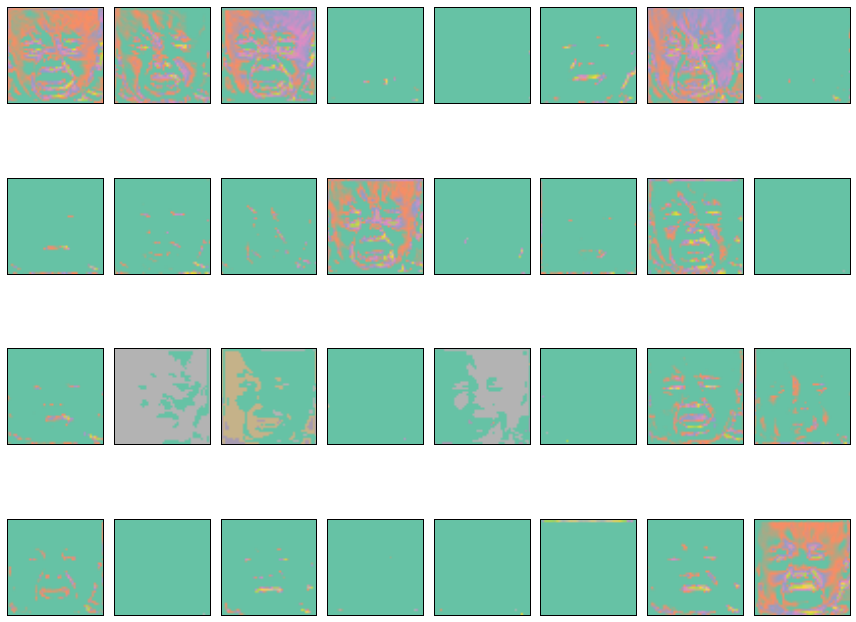

In [19]:
input_img = X[21:22,:,:,:]
# plt.imshow(input_img[0,0,:,:], cmap='gray')
plot_interlayer_outputs(input_img, 0, 1, colormaps=True)

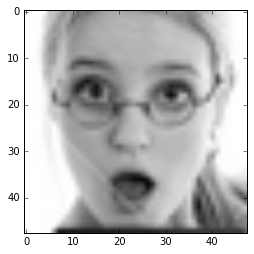

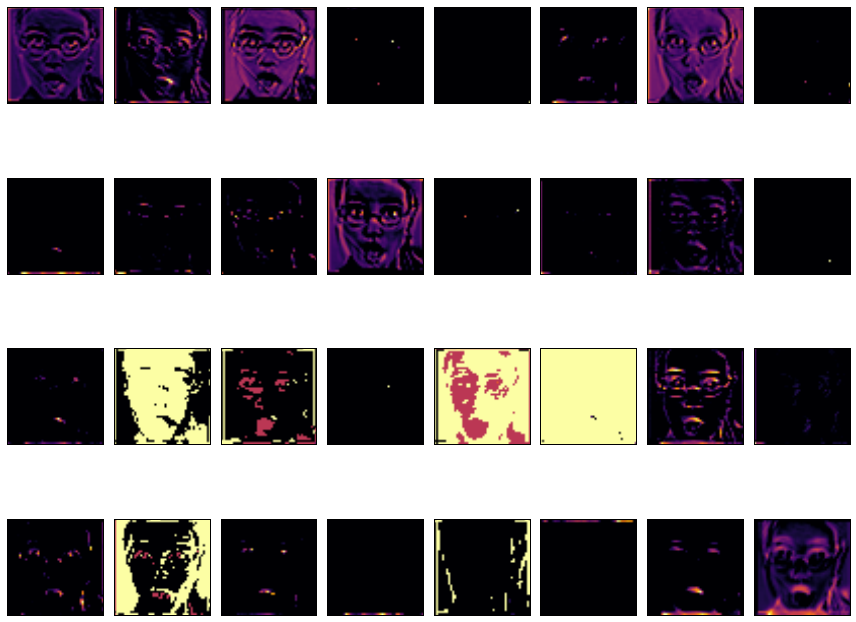

In [20]:
input_img = X[23:24,:,:,:]
plt.imshow(input_img[0,0,:,:], cmap='gray')
plot_interlayer_outputs(input_img, 0, 1)

In [21]:
y_prob = model.predict(X, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y]

In [22]:
# emotion = {'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3, 'Surprise': 4, 'Neutral': 5}
emotion = {0:'Angry', 1:'Fear', 2:'Happy', 3:'Sad', 4:'Surprise', 5:'Neutral'}

In [23]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry', 1:'Fear', 2:'Happy', 3:'Sad', 4:'Surprise', 5:'Neutral'}
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img[0,0,:,:], cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

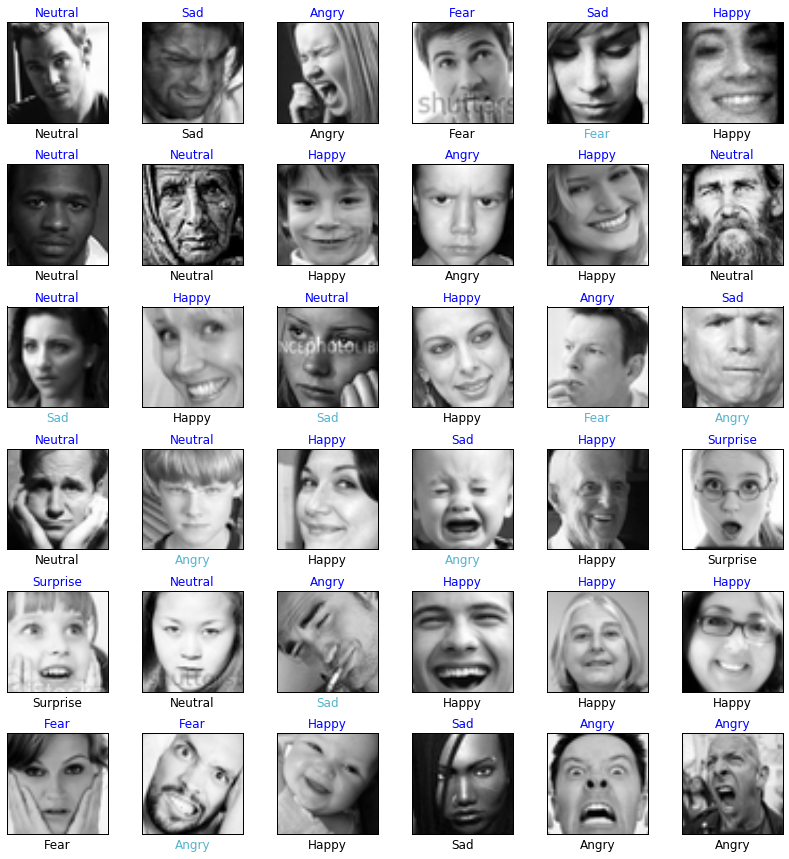

In [24]:
plot_subjects(0, 35, y_pred[0:36], y_true[0:36], title=True)

In [25]:
labels = ['angry', 'fear', 'happy', 'sad', 'surprise','neutral']
def plot_probs(start,end, y_prob):
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        ax.bar(np.arange(0,6), y_prob[i], color=set3,alpha=0.5)
        ax.set_xticks(np.arange(0.5,6.5,1))
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [26]:
# plot_subjects(0,5, y_pred, y_true,title=False)
# plot_probs(0,5,y_prob)

In [27]:
def plot_subjects_with_probs(start, end, y_prob):
    iter = (end - start)/6
    for i in np.arange(0,iter):
        plot_subjects(i*6,(i+1)*6-1, y_pred, y_true, title=False)
        plot_probs(i*6,(i+1)*6-1, y_prob)

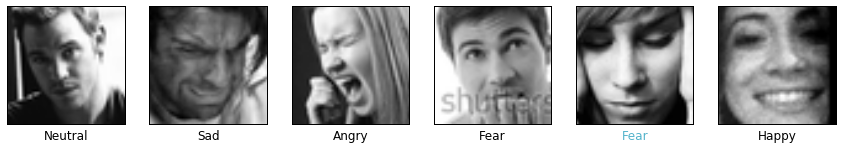

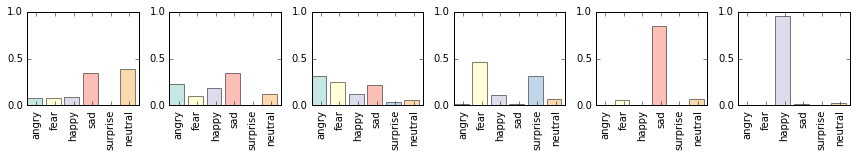

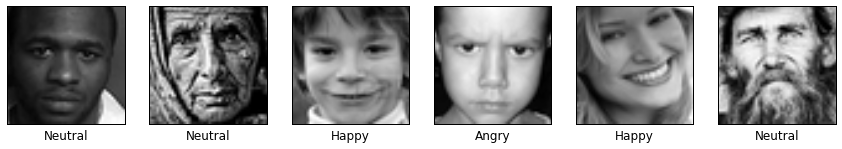

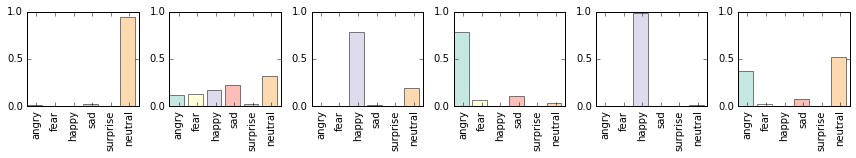

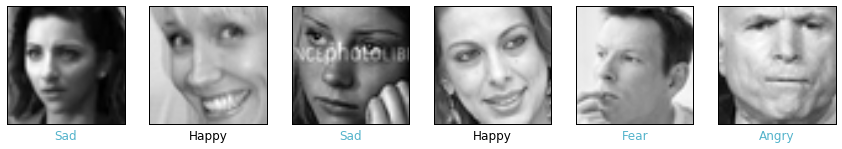

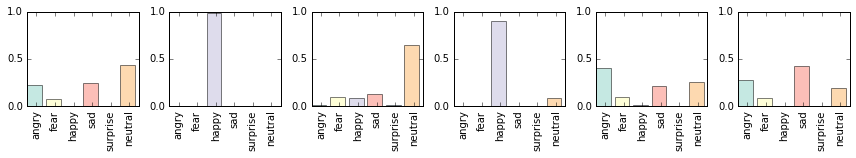

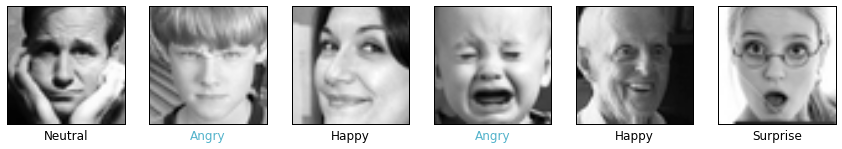

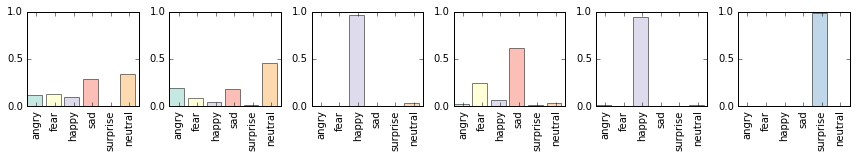

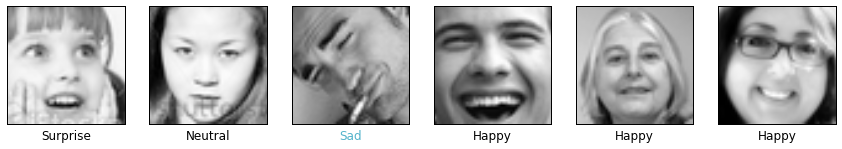

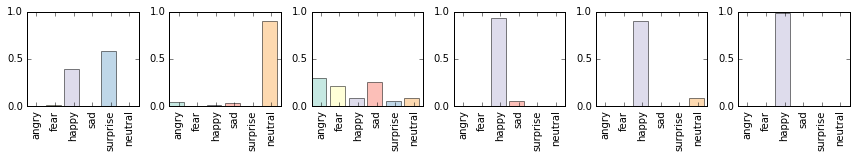

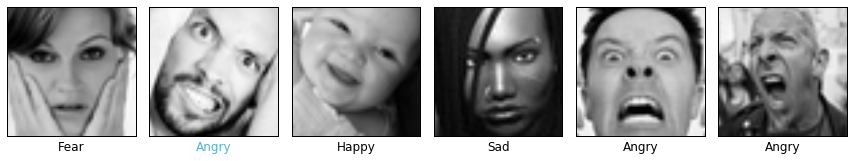

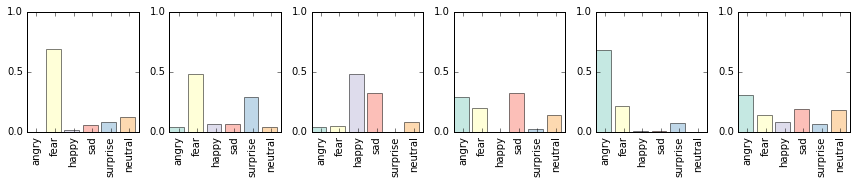

In [28]:
plot_subjects_with_probs(0, 36, y_prob)

### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

In [30]:
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(8,8))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,6):
        for j in range(0,6):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ax.set_title('Confusion Matrix (Public Set)')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

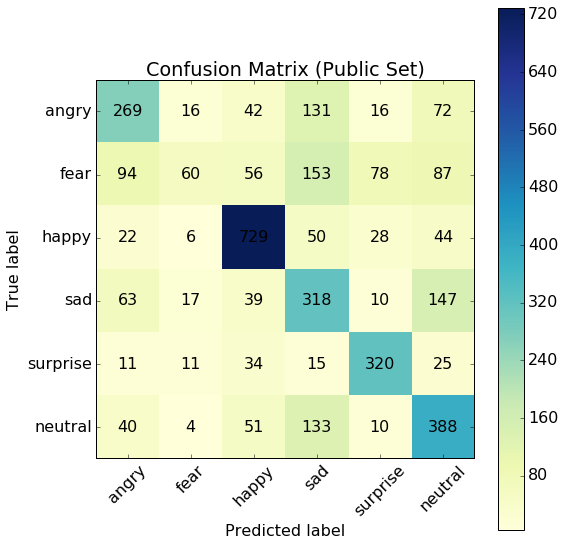

In [31]:
plot_confusion_matrix(cm, cmap=plt.cm.YlGnBu)

In [47]:
def plot_distribution(y_true, y_pred): 
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y_true), color=set3, alpha=0.8)
    ax1.set_xticks(np.arange(1.5,7.5,1))
    ax1.set_xticklabels(labels, rotation=90, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, 1000])
    ax1.set_title('True')
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y_pred), color=set3, alpha=0.4)
    ax2.set_xticks(np.arange(1.5,7.5,1))
    ax2.set_xticklabels(labels, rotation=90, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, 1000])
    ax2.set_title('Prediction')
    plt.tight_layout()
#     plt.show()

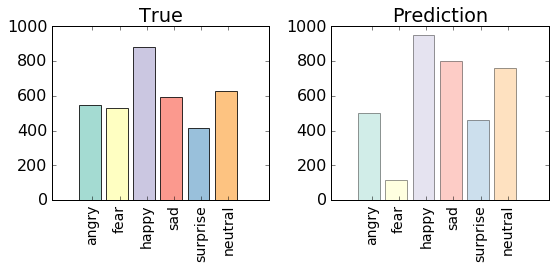

In [33]:
plot_distribution(y_true, y_pred)

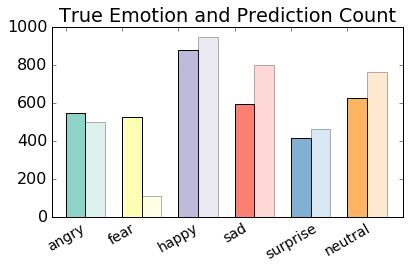

In [34]:
 def plot_distribution(y_true, y_pred):
    ind = np.arange(1.5,7,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=set3, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=set3, alpha=0.3)
    ax.set_xticks(np.arange(1.5,7,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 7.5])
    ax.set_ylim([0, 1000])
    ax.set_title('True Emotion and Prediction Count')
    plt.tight_layout()
    plt.show()
plot_distribution(y_true, y_pred)

In [ ]:
# fer2013 dataset:
# Training       28709
# PrivateTest     3589
# PublicTest      3589

# training set:
# [('angry', 4431),
#  ('fear', 4097),
#  ('happy', 7215),
#  ('sad', 4830),
#  ('surprise', 3171),
#  ('neutral', 4965)]

In [61]:
# data target summary
y_fname1 = 'data/y_publictest6_100pct.npy'
y_fname2 = 'data/y_train6.npy'
y_train = np.load(y_fname2)
y_public = np.load(y_fname1)
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]

In [69]:
def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y1), color=set3, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y2), color=set3, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()           

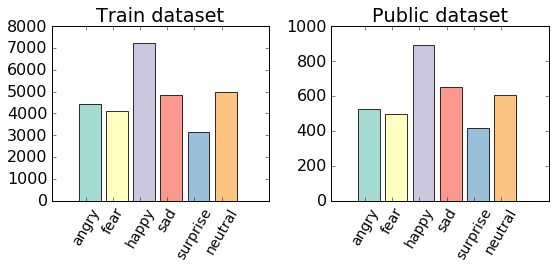

In [70]:
plot_distribution(y_train_labels, y_public_labels, ['Train dataset', 'Public dataset'], ylims =[8000,1000]) 